# Divvy Trips Data set analysis

Author: Galal Abdelaziz

This notebook presents my analysis of the [Divvy Trips 2019_Q1 dataset](https://divvy-tripdata.s3.amazonaws.com/index.html) for the __Programming For Data Analytics__ project, at [ATU](https://www.atu.ie/).

***

![Banner](img/divvy.jpg)

***

## Introduction:

This project aims to analyze the __Divvy trip__ data from the first quarter of 2019 to gain insights into city-wide biking trends.

***

## Analysis:

### Importing Libraries and Loading the Dataset:

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [161]:
file_path = 'dataset/Divvy_Trips_2019_Q1.csv'
df = pd.read_csv(file_path)

df.head(22)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0
5,21742448,2019-01-01 00:15:33,2019-01-01 00:19:09,2437,216.0,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Female,1983.0
6,21742449,2019-01-01 00:16:06,2019-01-01 00:19:03,2708,177.0,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Male,1984.0
7,21742450,2019-01-01 00:18:41,2019-01-01 00:20:21,2796,100.0,211,St. Clair St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1990.0
8,21742451,2019-01-01 00:18:43,2019-01-01 00:47:30,6205,"1,727.0",150,Fort Dearborn Dr & 31st St,148,State St & 33rd St,Subscriber,Male,1995.0
9,21742452,2019-01-01 00:19:18,2019-01-01 00:24:54,3939,336.0,268,Lake Shore Dr & North Blvd,141,Clark St & Lincoln Ave,Subscriber,Male,1996.0


### Inspecting the Dataset:

In [162]:
total_trips = df.shape[0]
print(f'Total number of Divvy trips in Q1 2019: {total_trips}')

Total number of Divvy trips in Q1 2019: 365069


In [163]:
unique_bikes = df['bikeid'].nunique()
print(f'Number of unique bikes utilized in Q1 2019: {unique_bikes}')

Number of unique bikes utilized in Q1 2019: 4769


In [164]:
missing_counts = {}

for column in df.columns:

    nan_count = df[column].isnull().sum()
    empty_count = (df[column] == '').sum()
    total_missing = nan_count + empty_count
    missing_counts[column] = total_missing

print("Missing Values (NaN and Empty Cells) in Each Column:")
for column, count in missing_counts.items():
    if count > 0:
        print(f"{column}: {count}")

print("\nColumn Headers:")
print(df.columns.tolist())

Missing Values (NaN and Empty Cells) in Each Column:
gender: 19711
birthyear: 18023

Column Headers:
['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration', 'from_station_id', 'from_station_name', 'to_station_id', 'to_station_name', 'usertype', 'gender', 'birthyear']


In [165]:
current_year = 2019

df['age'] = current_year - df['birthyear']

records_1938_or_older = df[df['birthyear'] <= 1938].shape[0]

average_age_all = df['age'].mean()
average_age_excluding_1938 = df[df['birthyear'] > 1938]['age'].mean()
average_age_1938_or_older = df[df['birthyear'] <= 1938]['age'].mean()

print(f'Number of users where the birth year is 1938 or older: {records_1938_or_older}')
print(f'Average age of users born in 1938 or earlier: {average_age_1938_or_older:.2f}')
print(f'Average age of all users: {average_age_all:.2f}')
print(f'Average age excluding those born in 1938 or earlier: {average_age_excluding_1938:.2f}')


Number of users where the birth year is 1938 or older: 186
Average age of users born in 1938 or earlier: 105.65
Average age of all users: 37.33
Average age excluding those born in 1938 or earlier: 37.29


In [174]:
gender_counts = df['gender'].value_counts()
gender_counts_df = gender_counts.reset_index()
gender_counts_df.columns = ['Gender', 'Count']

print("Number of Males and Females:")
print(gender_counts_df.to_string(index=False))

Number of Males and Females:
 Gender  Count
   Male 278267
 Female  66906
missing   1687


In [175]:
user_type_counts = df['usertype'].value_counts()
user_type_counts_df = user_type_counts.reset_index()
user_type_counts_df.columns = ['User  Type', 'Count']

print("Number of Subscribers and Customers:")
print(user_type_counts_df.to_string(index=False))

Number of Subscribers and Customers:
User  Type  Count
Subscriber 340825
  Customer   6035


### Data Preparation, Cleaning and Handling Missing Data:

In [167]:
# Data Cleaning
df['gender'].fillna('missing', inplace=True)

df = df[df['birthyear'] > 1938]

df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [168]:
# Data Preparation

df['day_of_week'] = df['start_time'].dt.day_name()

df['start_time_only'] = df['start_time'].dt.time
df['end_time_only'] = df['end_time'].dt.time

df.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age,day_of_week,start_time_only,end_time_only
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0,30.0,Tuesday,00:04:37,00:11:07
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0,29.0,Tuesday,00:08:13,00:15:34
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0,25.0,Tuesday,00:13:23,00:27:12
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0,26.0,Tuesday,00:13:45,00:43:28
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0,25.0,Tuesday,00:14:52,00:20:56


### Findings From The Dataset Inspection:

#### Dataset Overall:

#### Variables:

#### Users:

#### Missing Data:

### Variables analysis and Data Visualisation:

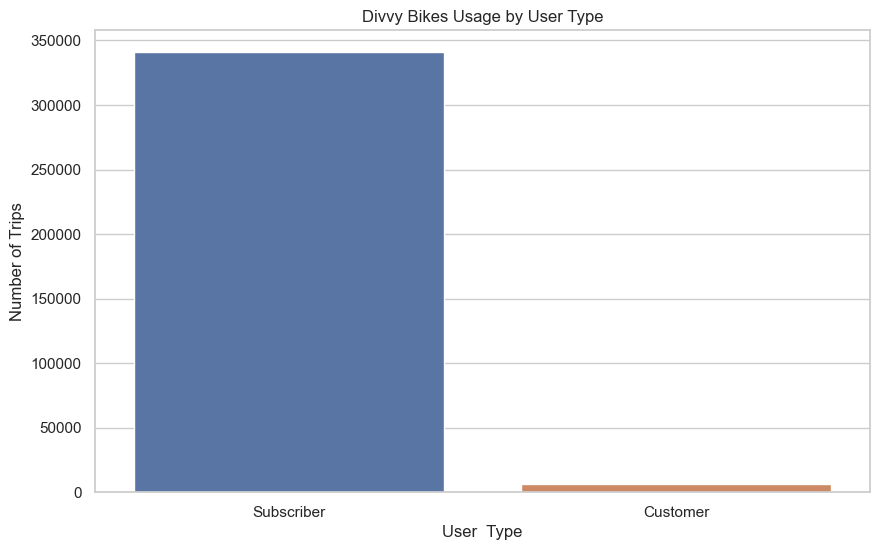

In [143]:
# Plotting Divvy Bikes usage (number of trips) divided between customers and subscribers
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='usertype')
plt.title('Divvy Bikes Usage by User Type')
plt.xlabel('User  Type')
plt.ylabel('Number of Trips')
plt.show()

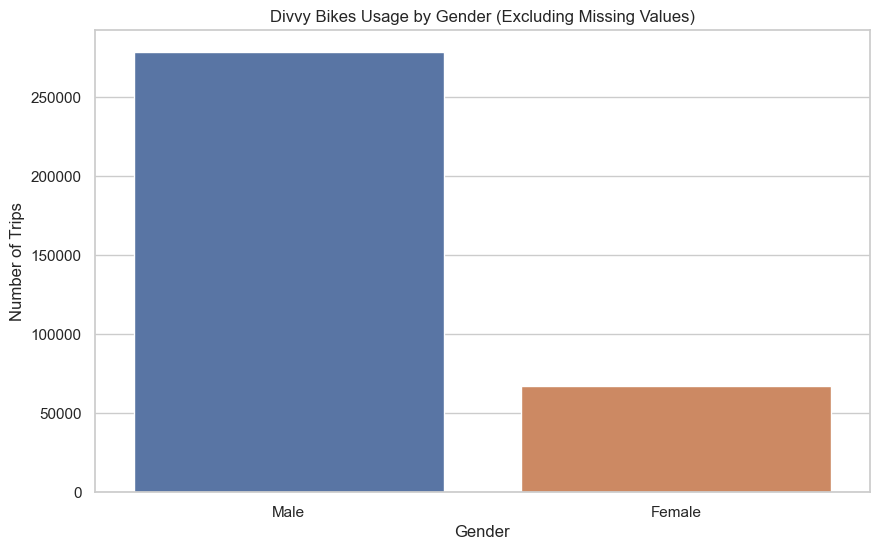

In [142]:
# Plotting the difference of usage more by female or male users, disregarding missing values
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['gender'] != 'missing'], x='gender')
plt.title('Divvy Bikes Usage by Gender (Excluding Missing Values)')
plt.xlabel('Gender')
plt.ylabel('Number of Trips')
plt.show()

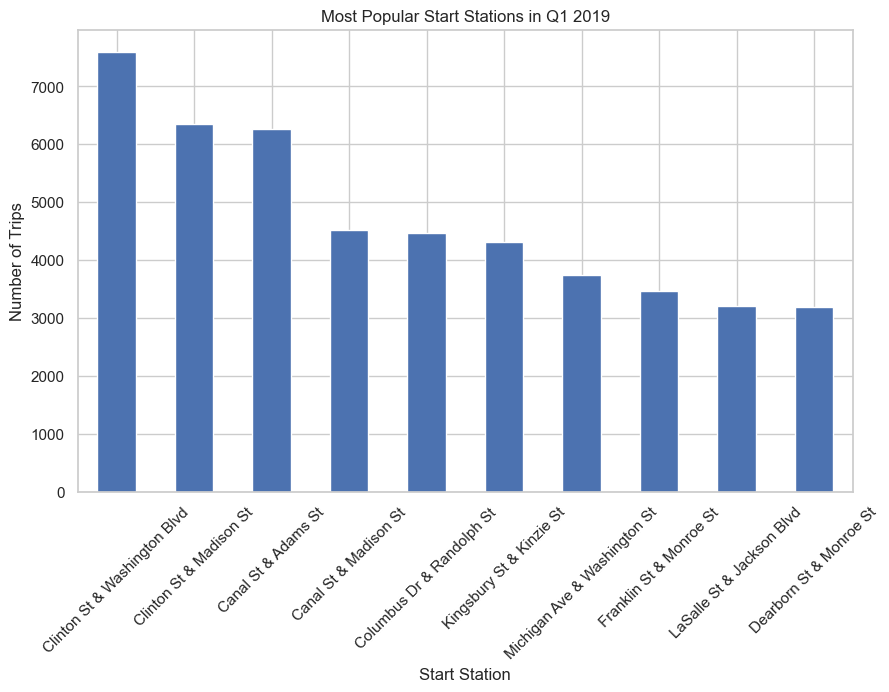

In [176]:
popular_start_stations = df['from_station_name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
popular_start_stations.plot(kind='bar')
plt.title('Most Popular Start Stations in Q1 2019')
plt.xlabel('Start Station')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

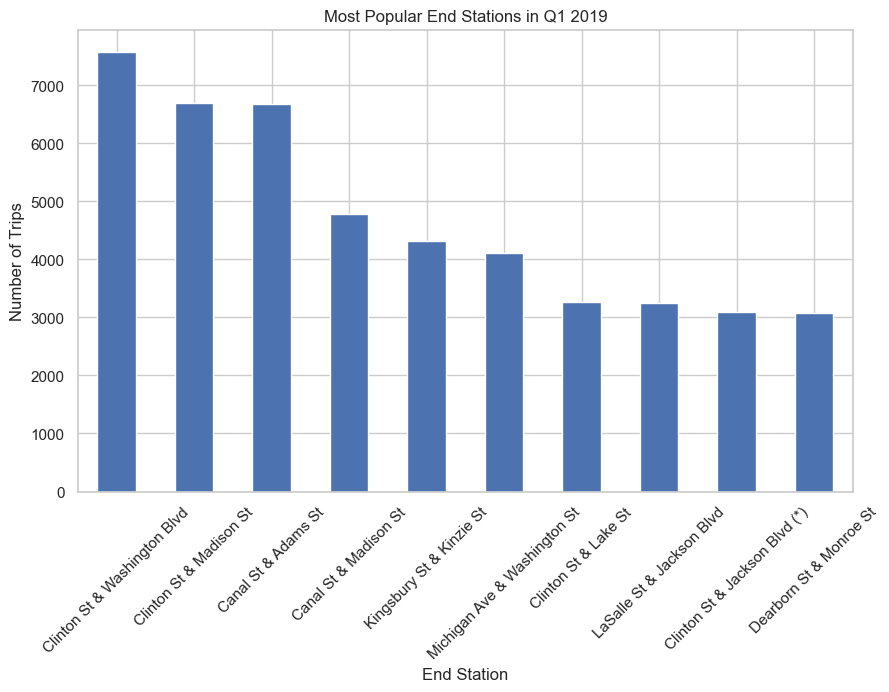

In [177]:
popular_end_stations = df['to_station_name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
popular_end_stations.plot(kind='bar')
plt.title('Most Popular End Stations in Q1 2019')
plt.xlabel('End Station')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

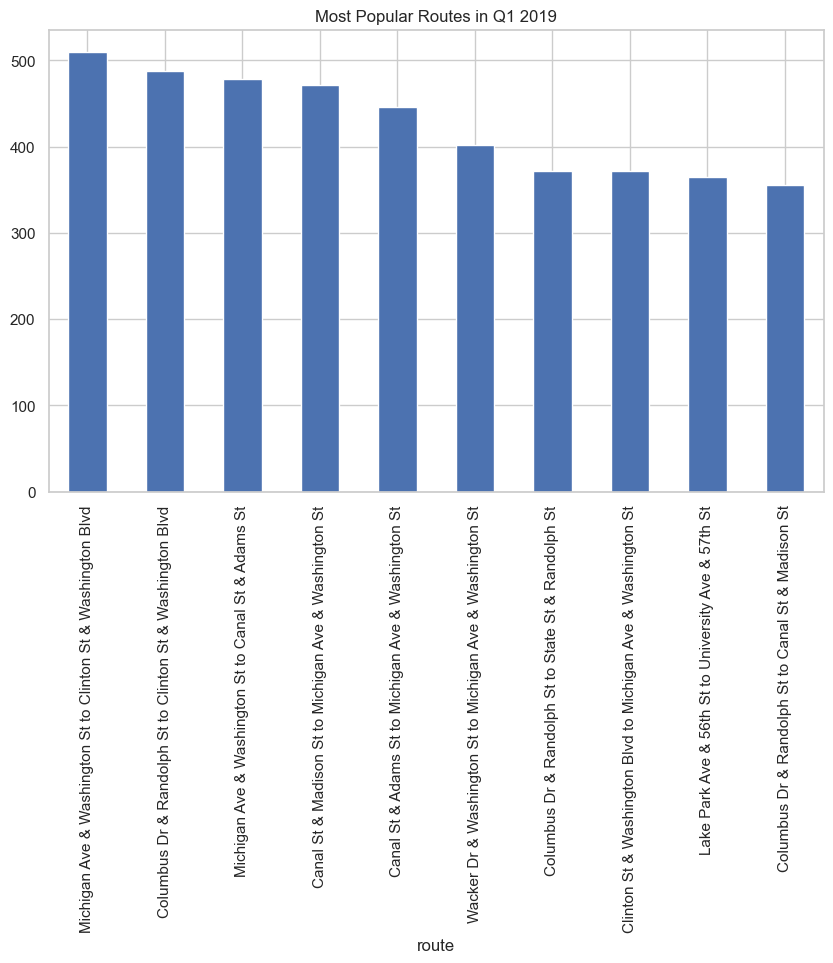

In [180]:
df['route'] = df['from_station_name'] + ' to ' + df['to_station_name']
popular_routes = df['route'].value_counts().head(10)

plt.figure(figsize=(10, 6))
popular_routes.plot(kind='bar')
plt.title('Most Popular Routes in Q1 2019')
plt.xlabel